# IBM HR Analytics Employee Attrition Prediction

# Pre-Processing, Training Data Development, and Modeling

## By: Chris Le

## Imports

In [1]:
# Import relevant libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Libaries for pre-processing
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import make_pipeline

# Libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import feature_selection

# Libraries for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

# Suppress future warning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Prepare the notebook for matplotlib and other libraries- show plots inline
%matplotlib inline

## Loading Data

In [2]:
# Load data and set parameter index_col=0, because first column contains no useful data. 
df = pd.read_csv('/Users/chrisle/Downloads/Employee_Attrition/data/interim/IBM_HR-Employee-Attrition_cleaned.csv', index_col=0)

## Explore Data

In [3]:
# check out data appearance
df.head(15)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,...,3,3,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,...,4,1,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,...,4,2,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,...,4,2,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,...,3,2,2,17,3,2,7,7,7,7


In [4]:
# Look at data shape
df.shape

(1470, 31)

In [5]:
# obtain data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [6]:
# Identifying Categorical Variables
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human 

In [7]:
categorical_col.remove('Attrition')

## Label Encoding and Dummy Features Creation for Categorical Variables

In [8]:
# Get column names
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [9]:
# Feature selection:
features = ['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [10]:
# Make explanatory and target variable
X = df[features]
y = df.Attrition

In [11]:
# Label encode target variable
y = df['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [12]:
X.shape

(1470, 30)

In [13]:
# Convert rest of categorical variables into dummies
X = pd.get_dummies(X, drop_first=True)

In [14]:
X.shape

(1470, 44)

In [15]:
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,1,0,0


## Split Data into Training and Testing Subsets

In [16]:
# Split into train/test data sets with stratification of target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=24,
                                                    stratify = y)

In [17]:
# Confirm training data shape
print("Training set Shape:", X_train.shape, y_train.shape)

Training set Shape: (1029, 44) (1029,)


In [18]:
# Confirm testing data shape
print("Testing set Shape:", X_test.shape, y_test.shape)

Testing set Shape: (441, 44) (441,)


## Scaling Features

In [19]:
# Make Scaler object
scaler = StandardScaler()

In [20]:
# Fit scaler based on training data
scaler.fit(X_train)

StandardScaler()

In [21]:
# Transform training data using fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Re-introduce column names back into new scaled df
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [23]:
# View new scaled df appearance
X_train_scaled.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,-1.307746,0.455222,-0.901268,-1.887987,1.170305,-0.435093,0.388015,-0.964482,0.263620,-0.543169,...,2.304969,-0.284398,-0.344207,-0.239904,-0.516954,-0.525999,-0.23763,-0.933225,-0.659656,1.600173
1,1.558198,-1.366881,-0.058282,0.060597,1.170305,0.845346,0.388015,2.595883,-0.637593,2.768264,...,-0.433845,3.516196,-0.344207,-0.239904,-0.516954,-0.525999,-0.23763,-0.933225,-0.659656,1.600173
2,0.345683,1.484464,1.988970,0.060597,-0.669640,-0.582836,0.388015,-0.074391,-0.637593,-0.203470,...,-0.433845,-0.284398,-0.344207,-0.239904,1.934408,-0.525999,-0.23763,-0.933225,-0.659656,-0.624932
3,-0.646375,-1.337334,-0.419562,1.034889,-0.669640,0.500613,-2.384674,-0.074391,0.263620,-0.085160,...,-0.433845,-0.284398,-0.344207,-0.239904,-0.516954,1.901144,-0.23763,1.071553,-0.659656,1.600173
4,-0.205460,0.066178,-0.901268,0.060597,0.250333,-1.075312,-0.998330,0.815701,-0.637593,0.770763,...,-0.433845,-0.284398,2.905231,-0.239904,-0.516954,-0.525999,-0.23763,-0.933225,-0.659656,-0.624932


## Modeling

In [24]:
# Define function for evaluation reports
def print_score(clf, X_train_scaled, y_train, X_test_scaled, y_test, train=True):
    if train:
        pred = clf.predict(X_train_scaled)
        clf_report = classification_report(y_train, pred)
        print("Training Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test_scaled)
        clf_report = classification_report(y_test, pred)
        print("Testing Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

### Logistic Regression

In [25]:
# Create a logistic regression object
log_reg = LogisticRegression(solver = 'liblinear', max_iter = 500)

In [26]:
# Fit model to training set
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500, solver='liblinear')

In [27]:
# Use fitted model to make predictions on training and test data
y_pred_training = log_reg.predict(X_train_scaled)
y_pred_test = log_reg.predict(X_test_scaled)

In [28]:
# Review performance metrics
print_score(log_reg, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(log_reg, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

Training Result:
Accuracy Score: 90.28%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       863
           1       0.84      0.49      0.62       166

    accuracy                           0.90      1029
   macro avg       0.88      0.74      0.78      1029
weighted avg       0.90      0.90      0.89      1029

_______________________________________________
Confusion Matrix: 
 [[848  15]
 [ 85  81]]

Testing Result:
Accuracy Score: 86.62%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       370
           1       0.62      0.45      0.52        71

    accuracy                           0.87       441
   macro avg       0.76      0.70      0.72       441
weighted avg       0.85      0.87      0.86       441

_________________________________

Initial implementation of the logistic regression model resulted in 90.28% accuracy score in the training set, which is pretty good and indicates there is only a small bias in the model. 

The initial logistic regression model's test accuracy is 86.62%, which is very close (~3.66%) to the training accuracy score and shows that there is only a small variance between the training and testing accuracy scores. However, this gap between traning and testing accuracy may be slighlty over-fitting the data. With that said, this first iteration of the logistic regression model may alreadly generalize relatively well. 

Other metrics that we should also when evaluating the performance of a binary classifier are the precision, recall, and F1-scores. A high precision score would mean that our model makes few false positive predictions, and is good at identifying which employees will potentially attrition. This would be appropriate if the goal is to minimize instances of employees who are staying with the company, but are misclassified as leaving. On the other hand, a high recall score indicates that the classifier has a high true positive rate and thus is good at minimizing instances of employees who will attrition, but are misclassified as staying. In our case, it may be slighly more important to identify all employees who will leave, even if it means a higher number of false positive predictions, because missing employees who will atrrition may result in lost resources, productivity, and replacement costs. 

For the attrition class of the testing set, the precision score was 62%, the recall score is 45%, and F1-score is 52%.

Since there is a mild-moderate class imbalance in the dataset as employee attrition occurs less frequently than employees who stay, accuracy scores may not be an ideal indicator of model performance because of the potentially skewed evaluation . Thus, we should also consider the weighted average, which takes into account the imblance between the classes in the target variable.

In this case, the weighted-avg scores for precision, recall, and F1 are 85%, 87%, and 86%, respectively. 

In [50]:
# Review ROC AUC score
lr_roc = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:,1], average='weighted')
print("ROC AUC Score:", lr_roc)

ROC AUC Score: 0.8256566425580509


Lastly, another important evaluation metric for binary classification problems is the ROC AUC score (Receiver Operating Characteristic - Area Under the Curve), which provides a measure of how well the model can distinguish between employees who will leave and employees who will stay based on their predicted probabilities. 

The first iteration of the logistic regression model resulted in a 82.57% AUC score, which is pretty high. 

### Logistic Regression Hyperparameter Tuning

In [30]:
# Define the logistic regression hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
}

# Create a logistic regression object
log_reg2 = LogisticRegression(max_iter = 1000)

# Use GridSearchCV to perform a hyperparameter search
grid_search = GridSearchCV(log_reg2, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_hyperparameters = grid_search.best_params_

In [31]:
print("Best Logistic Regression Model Hyperparameters:", best_hyperparameters)

Best Logistic Regression Model Hyperparameters: {'C': 0.1, 'solver': 'sag'}


In [32]:
# Train a logistic regression model using the best hyperparameters
log_reg3 = LogisticRegression(**best_hyperparameters)
log_reg3.fit(X_train_scaled, y_train)

# Make predictions on new data
y_pred2 = log_reg3.predict(X_test_scaled)

In [33]:
# Review performance metrics
print_score(log_reg3, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(log_reg3, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

Training Result:
Accuracy Score: 90.28%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.91      0.99      0.94       863
           1       0.88      0.46      0.61       166

    accuracy                           0.90      1029
   macro avg       0.89      0.73      0.78      1029
weighted avg       0.90      0.90      0.89      1029

_______________________________________________
Confusion Matrix: 
 [[852  11]
 [ 89  77]]

Testing Result:
Accuracy Score: 87.76%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       370
           1       0.70      0.42      0.53        71

    accuracy                           0.88       441
   macro avg       0.80      0.69      0.73       441
weighted avg       0.86      0.88      0.86       441

_________________________________

In [51]:
# Review ROC AUC score
lr_roc_final = roc_auc_score(y_test, log_reg3.predict_proba(X_test_scaled)[:,1], average='weighted')
print("ROC AUC Score:", lr_roc_final)

ROC AUC Score: 0.8232204035020937


Text(0.5, 427.9555555555555, 'Predicted label')

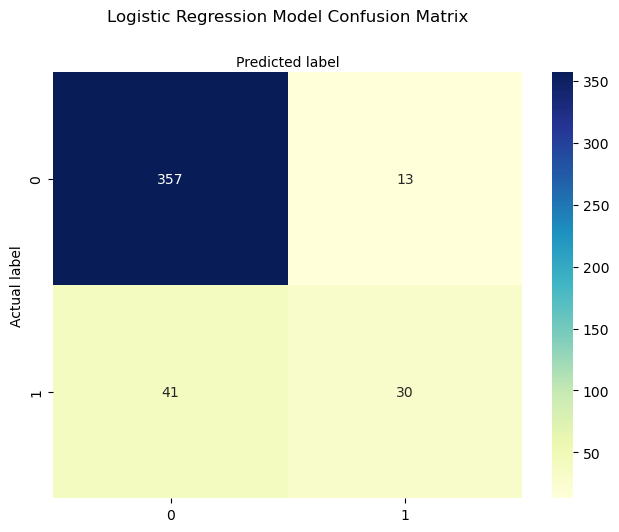

In [35]:
# Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred2)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Logistic Regression Model Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

After hyperparameter tuning the logistic regression model, the best hyperparameters when scoring based on ROC AUC score were: {'C': 0.1, 'solver': 'sag'}.

- This resulted in 90.28% training accuracy and 87.76% testing accuracy, which is slightly higher testing accuracy than the first iteration of the logistic regression model (86.62%). 
- The precision score (62% to 70%) and F1-score (52% to 53%) increased while the recall score (45% to 42%) decreased. 
- The ROC AUC score was suprisingly better in the first iteration at 82.57% compared to 82.32% after fine tuning the model, which suggests the model may have slightly overfitted the data. 
- When looking at the confusion matrix for the fine-tuned model, we can see that when we predict employee attrition, about 30% (13 of 43) of the time we are predicting a false positive, while the false negatives (predicting an employee will attrition, when in fact they are staying) is about 10% (41 of 398). 

## Random Forest

In [36]:
# Create a Random Forest Classifier Object
rf_clf1 = RandomForestClassifier(n_estimators=100, random_state=30)

# Fit Random Forest Classifier to training data
rf_clf1.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=30)

In [37]:
# Make preditions on the test set
y_pred = rf_clf1.predict(X_test_scaled)

In [38]:
# Review performance metrics
print_score(rf_clf1, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(rf_clf1, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

Training Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       166

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029

_______________________________________________
Confusion Matrix: 
 [[863   0]
 [  0 166]]

Testing Result:
Accuracy Score: 85.49%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       370
           1       0.77      0.14      0.24        71

    accuracy                           0.85       441
   macro avg       0.81      0.57      0.58       441
weighted avg       0.84      0.85      0.81       441

________________________________

In [39]:
# Review ROC AUC score
rf_roc = roc_auc_score(y_test, rf_clf1.predict_proba(X_test_scaled)[:,1], average='weighted')
print("ROC AUC Score:", rf_roc)

ROC AUC Score: 0.829139703083365


The first iteration of the random forest classifier model resulted in a training accuracy of 100% and a testing accuracy of 85.49%. While the training accuracy is excellent, the 14.5% difference in training and testing accuracy suggests that the model overfitted the data. 

For the attrition class, the precision score is quite high at 77%, but the recall score of 14% and F1-score of 24% are relatively low. 

When looking at the weighted-average of the scores, they are quite respectable at precision=84%, recall=85%, and F1-score=81%. 

The ROC AUC score is 82.91% which is higher than the logistic regression models. 

### Random Forest Hyperparameter Tuning

In [40]:
# Define the random forest hyperparameter grid
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [1, 2, 3, 4]
bootstrap = [True, False]

params_grid = {
    'n_estimators': n_estimators, 
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf, 
    'bootstrap': bootstrap
}

In [41]:
# Create a Random Forest Classifier Object
rf_clf2 = RandomForestClassifier(random_state=30)

# Use RandomizedSearchCV to perform a hyperparameter search
rf_cv = RandomizedSearchCV(
    estimator=rf_clf2, 
    scoring='roc_auc',
    param_distributions=params_grid,
    n_iter=400,
    cv=5, 
    verbose=1, 
    random_state=30,
    n_jobs=-1
)

rf_cv.fit(X_train_scaled, y_train)

# Get best parameters
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params}")

# Train Random Foreset Classifier using best parameters and fit to model
rf_clf3 = RandomForestClassifier(**rf_best_params)
rf_clf3.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best paramters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 10, 'bootstrap': True}


RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200)

In [42]:
# Review performance metrics
print_score(rf_clf3, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(rf_clf3, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

Training Result:
Accuracy Score: 92.52%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       863
           1       1.00      0.54      0.70       166

    accuracy                           0.93      1029
   macro avg       0.96      0.77      0.83      1029
weighted avg       0.93      0.93      0.92      1029

_______________________________________________
Confusion Matrix: 
 [[863   0]
 [ 77  89]]

Testing Result:
Accuracy Score: 85.71%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       370
           1       0.90      0.13      0.22        71

    accuracy                           0.86       441
   macro avg       0.88      0.56      0.57       441
weighted avg       0.86      0.86      0.81       441

_________________________________

In [43]:
# Review ROC AUC score
rf_roc_final = roc_auc_score(y_test, rf_clf3.predict_proba(X_test_scaled)[:,1], average='weighted')
print("ROC AUC Score:", rf_roc_final)

ROC AUC Score: 0.8215835553863723


Text(0.5, 427.9555555555555, 'Predicted Label')

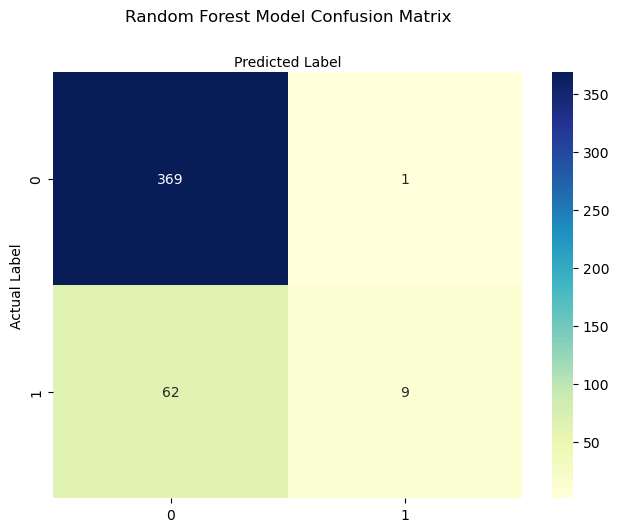

In [44]:
# Confusion Matrix
cnf_matrix = confusion_matrix(y_test, rf_clf3.predict(X_test_scaled))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Random Forest Model Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

After hyperparameter tuning the random forest classifier model, the best hyperparameters were: 
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 10, 'bootstrap': True}

- This resulted in 92.52 % training accuracy and 85.71% testing accuracy. The fine tuned model had a lower training accuracy (down from 100%), but had a slighlty higher testing accuracy (up from 85.49%). This may be due to less overfitting of the data by the model. 
- The precision score increased from (77% to 90%), but the recall score and F1-score decreased from 14% and 24% to 13% and 22%, respectively. 
- The ROC AUC score slightly declined from first iteration of 82.91% to 82.16%. 
- When looking at the confusion matrix for the fine-tuned random forest classifer model, we can see that when we predict employee attrition, about 10% (1 of 10) of the time we are predicting a false positive, while the false negatives (predicting an employee will attrition, when in fact they are staying) is about 14% (62 of 431). 

In [74]:
# Determine Feature Importance Based on Random Forest Model
col=sns.color_palette("mako", 20).as_hex()[::-1]
feat=pd.DataFrame({"Importance": rf_cv.best_estimator_.feature_importances_}, index=X_train_scaled.columns
                 ).sort_values(by="Importance")
plot_df=feat.nlargest(20, columns='Importance').sort_values(by="Importance", ascending=False)
fig = px.bar(plot_df, x=plot_df.index, y='Importance', text='Importance', 
             color=plot_df.index, opacity=0.7, color_discrete_sequence=col)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside',
                  marker_line=dict(width=1, color='#3F3B3A'), 
                  hovertemplate='%{x}<br>Importance = %{y:.2f}')
fig.update_layout(title_text='Top 20 Most Important Predictors of Employee Attrition Based on Random Forest Model', 
                  coloraxis_showscale=False, showlegend=False,font_color="#303030", height = 500,
                  paper_bgcolor='white', plot_bgcolor='white', yaxis_title="Importance", 
                  xaxis = dict(title="", showgrid=True, gridcolor="#f5f5f5"))
fig.show()

**Feature Importance**

The top 5 most dominant features or predictors of employee attrition in the random forest model were:
1. OverTime_Yes
2. MonthlyIncome
3. Age
4. TotalWorkingYears
5. DistanceFromHome

## XGBoost

In [58]:
# Create a XGBoost Classifier Object
xgb_clf1 = XGBClassifier(random_state=30)

# Fit XGBoost Classifier to training data
xgb_clf1.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=30, ...)

In [59]:
# Make preditions on the test set
y_pred3 = xgb_clf1.predict(X_test_scaled)

In [60]:
# Review performance metrics
print_score(xgb_clf1, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(xgb_clf1, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

Training Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       166

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029

_______________________________________________
Confusion Matrix: 
 [[863   0]
 [  0 166]]

Testing Result:
Accuracy Score: 85.49%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       370
           1       0.60      0.30      0.40        71

    accuracy                           0.85       441
   macro avg       0.74      0.63      0.66       441
weighted avg       0.83      0.85      0.83       441

________________________________

In [61]:
# Review ROC AUC score
xgb_roc = roc_auc_score(y_test, xgb_clf1.predict_proba(X_test_scaled)[:,1], average='weighted')
print("ROC AUC Score:", xgb_roc)

ROC AUC Score: 0.8257708412637991


The first iteration of the XGBoost classifier model resulted in a training accuracy of 100% and a testing accuracy of 85.49%. This accuracy scores of this first iteration is exactly the same as the first iteration of the random forest model. Similarly, the 100% training accuracy and the 14.5% gap between training and testing accuracy scores suggests that the model is overfitting the data. 

The F1-score is relatively high at 40% compared to the logistic regression and random forest models. The precision score is a respectable 60% and the recall score is good at 30%. 

Tthe weighted-average of the scores are good at precision=83%, recall=85%, and F1-score=83%. 

The ROC AUC score is 82.58% is also pretty good for the first iteration.

### XGBoost Hyperparameter Tuning

In [67]:
# Define the XGBoost hyperparameter grid
n_estimators = [100, 200, 500, 750]
learning_rate = [0.01, 0.02, 0.05, 0.1, 0.25]
min_child_weight = [1, 5, 7, 10]
gamma = [0.1, 0.5, 1, 1.5, 5]
subsample = [0.6, 0.8, 1.0]
colsample_bytree = [0.6, 0.8, 1.0]
max_depth = [3, 4, 5, 10, 12]

params_grid_xgb = {
        'n_estimators' : n_estimators,
        'learning_rate' : learning_rate,
        'min_child_weight': min_child_weight,
        'gamma': gamma,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'max_depth': max_depth
}

In [68]:
# Create a XGBoost Classifier Object
xgb_clf2 = XGBClassifier(random_state=30)

# Use RandomizedSearchCV to perform a hyperparameter search
xgb_cv = RandomizedSearchCV(
    estimator=xgb_clf2, 
    scoring='roc_auc',
    param_distributions=params_grid_xgb,
    n_iter=400,
    cv=5, 
    verbose=1, 
    random_state=30,
    n_jobs=-1
)

xgb_cv.fit(X_train_scaled, y_train)

# Get best parameters
xgb_best_params = xgb_cv.best_params_
print(f"Best paramters: {xgb_best_params}")

# Train Random Foreset Classifier using best parameters and fit to model
xgb_clf3 = XGBClassifier(**xgb_best_params)
xgb_clf3.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best paramters: {'subsample': 0.6, 'n_estimators': 750, 'min_child_weight': 10, 'max_depth': 12, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.6}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              n_estimators=750, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [69]:
# Review performance metrics
print_score(xgb_clf3, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(xgb_clf3, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

Training Result:
Accuracy Score: 89.31%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       863
           1       0.91      0.37      0.53       166

    accuracy                           0.89      1029
   macro avg       0.90      0.68      0.73      1029
weighted avg       0.90      0.89      0.87      1029

_______________________________________________
Confusion Matrix: 
 [[857   6]
 [104  62]]

Testing Result:
Accuracy Score: 87.98%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       370
           1       0.88      0.30      0.44        71

    accuracy                           0.88       441
   macro avg       0.88      0.64      0.69       441
weighted avg       0.88      0.88      0.85       441

_________________________________

In [70]:
# Review ROC AUC score
xgb_roc_final = roc_auc_score(y_test, xgb_clf3.predict_proba(X_test_scaled)[:,1], average='weighted')
print("ROC AUC Score:", xgb_roc_final)

ROC AUC Score: 0.8403121431290445


Text(0.5, 427.9555555555555, 'Predicted Label')

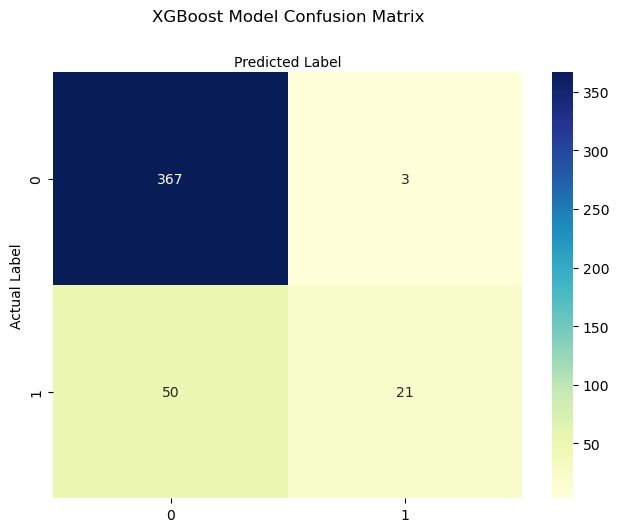

In [71]:
# Confusion Matrix
cnf_matrix = confusion_matrix(y_test, xgb_clf3.predict(X_test_scaled))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('XGBoost Model Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

After hyperparameter tuning the XGBoost classifier model, the best hyperparameters were: 
{'subsample': 0.6, 'n_estimators': 750, 'min_child_weight': 10, 'max_depth': 12, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.6}

- After fine-tuning the model, the testing accuracy increased by 2.49%.This resulted in 89.31% training accuracy and 87.98% testing accuracy.  
- The precision score significantly increased by 28% (from 60% to 88%), F1-score increased by 4% (from 40% to 44%), and the recall score remained stable at 30%. 
- The ROC AUC score also considerably improved by 1.45% (from 85.58% to 84.03%). 
- When looking at the confusion matrix for the fine-tuned XGBoost classifer model, we can see that when we predict employee attrition, about 13% (3 of 24) of the time we are predicting a false positive, while the false negatives (predicting an employee will attrition, when in fact they are staying) is about 12% (50 of 417). 

In [73]:
# Determine Feature Importance Based on XGBoost Model
col=sns.color_palette("mako", 20).as_hex()[::-1]
feat=pd.DataFrame({"Importance": xgb_cv.best_estimator_.feature_importances_}, index=X_train_scaled.columns
                 ).sort_values(by="Importance")
plot_df=feat.nlargest(20, columns='Importance').sort_values(by="Importance", ascending=False)
fig = px.bar(plot_df, x=plot_df.index, y='Importance', text='Importance', 
             color=plot_df.index, opacity=0.7, color_discrete_sequence=col)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside',
                  marker_line=dict(width=1, color='#3F3B3A'), 
                  hovertemplate='%{x}<br>Importance = %{y:.2f}')
fig.update_layout(title_text='Top 20 Most Important Predictors of Employee Attrition Based on XGBoost Model', 
                  coloraxis_showscale=False, showlegend=False,font_color="#303030", height = 500,
                  paper_bgcolor='white', plot_bgcolor='white', yaxis_title="Importance", 
                  xaxis = dict(title="", showgrid=True, gridcolor="#f5f5f5"))
fig.show()

**Feature Importance**

The top 5 most dominant features or predictors of employee attrition in the XGBoost model were:
1. OverTime_Yes
2. TotalWorkingYears
3. MonthlyIncome
4. JobLevel
5. JobRole_Sales Executive

## Final Model Selection

### Compare Models

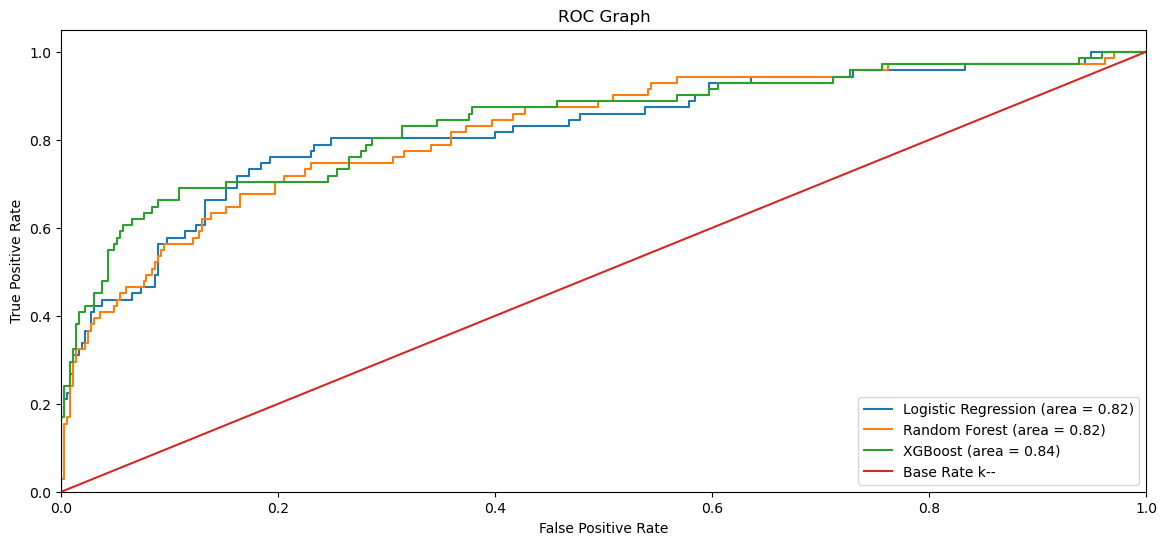

In [75]:
# Create ROC Graph
fpr, tpr, thresholds = roc_curve(y_test, log_reg3.predict_proba(X_test_scaled)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_clf3.predict_proba(X_test_scaled)[:,1])
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_clf3.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_roc_final)
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_final)
# Plot XGBoost ROC
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (area = %0.2f)' % xgb_roc_final)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [88]:
# Print testing results of all models after hyperparameter turning
print("Logistic Regression Model:\n")
print_score(log_reg3, X_train_scaled, y_train, X_test_scaled, y_test, train=False)
print(f"Logistic Regression AUC Score: {lr_roc_final * 100:.2f}%")
print("\n================================================")

print("Random Forest Model:\n")
print_score(rf_clf3, X_train_scaled, y_train, X_test_scaled, y_test, train=False)
print(f"Random Forest AUC Score: {rf_roc_final * 100:.2f}%")
print("\n================================================")

print("XGBoost Model:\n")
print_score(xgb_clf3, X_train_scaled, y_train, X_test_scaled, y_test, train=False)
print(f"XGBoost AUC Score: {xgb_roc_final * 100:.2f}%")

Logistic Regression Model:

Testing Result:
Accuracy Score: 87.76%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       370
           1       0.70      0.42      0.53        71

    accuracy                           0.88       441
   macro avg       0.80      0.69      0.73       441
weighted avg       0.86      0.88      0.86       441

_______________________________________________
Confusion Matrix: 
 [[357  13]
 [ 41  30]]

Logistic Regression AUC Score: 82.32%

Random Forest Model:

Testing Result:
Accuracy Score: 85.71%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       370
           1       0.90      0.13      0.22        71

    accuracy                           0.86       441
   macro avg       0.88      0.56      0.57       441


Based on the accuracy and roc auc score, the model I would choose is the XGBoost Classifier.
- The XGBoost Classifer resulted in the highest accuracy score at 87.98% and AUC score of 84.03%
- The weighted average precision, recall, and F1 scores are good at 88%, 88%, and 85% respectively.

## Summary

In this notebook, we explored three different binary classifier models: **Logistic Regression, Random Forest, and XGBoost**.

- To start of, the categorical variables were identified and then converted into dummy features. The target variable, Attrition, was also label encoded. 
- Then, the data was split into training and test data subsets with a 70/30 split. 
- In order to standardize the magntiude of all the numerical features, a standard scaler was first fitting based on the training data and then the scaler was applied to both the training and testing sets. 
- The first model that was implemented was the logistic regression model. The first iteration of the logistic regression model resulted in a training accuracy of 90.28% and testing accuracy of 86.62%. After hyperparameter tuning the model, the testing accuracy increased to 87.76%, but the ROC AUC score decreased from 82.57% to 82.32% which suggests the fine tuned logistic regression model may have overfitted the data.
- The random forest classifier model was the second algorithm applied. The first iteration of the random forest classifier model resulted in a training accuracy of 100% and a testing accuracy of 85.49%. While the training accuracy is excellent, the 14.5% difference in training and testing accuracy suggests that the model overfitted the data. Simiarly to the logistic regression model, the finely tuned random forest classifier model had a higher testing accuracy score at 85.71%, but the ROC AUC score slightly declined from first iteration of 82.91% to 82.16%. Based on the random forest model, the top 5 most important features were: OverTime_Yes, MonthlyIncome, Age, TotalWorkingYears, and DistanceFromHome.
- The third model implemented was the XGBoost classifier model. The first iteration of the XGBoost classifier model resulted in a training accuracy of 100% and a testing accuracy of 85.49%. After fine-tuning the model, the testing accuracy increased by 2.49%, which resulted in 89.31% training accuracy and 87.98% testing accuracy. The ROC AUC score also improved by 1.45% (from 85.58% to 84.03%). 

The final model that I think is the best model for this project is the **XGBoost Classifier model**. 
- This model resulted in the highest overall accuracy and AUC scores. 
-The weighted average precision, recall, and F1 scores are good at 88%, 88%, and 85% respectively.

When looking at the confusion matrix for the fine-tuned XGBoost classifer model: 
- We can see that when we predict employee attrition, about 13% (3 of 24) of the time we are predicting a false positive.
- While the false negatives (predicting an employee will attrition, when in fact they are staying) is about 12% (50 of 417).

## Employee Attrition Plan

Based on the final model, the top 5 most important predictors/features of employee attrition are:
1. **OverTime_Yes**: employees who work overtime are most likely to leave the company.
2. **TotalWorkingYears**: employees with more total working years or work experience are less likely to attrition. 
3. **MonthlyIncome**: employees with higher monthly income or high wages are less likely to leave the company. 
4. **JobLevel**: employees with a higher job level are less likely to attrition from the company.
5. **JobRole_Sales Executive**: sales executive employees are most likely to attrition from company compared to employees with other job roles. 

With that said, we can develop a strategic retention plan based on these strong indicators of employees potentially leaving the company:
- ***Address Overworking:*** Implement policies and procedures to reduce excessive overtime and promote a healthy work-life balance for employees. This could include setting clear limits on the number of hours employees are expected to work each week, providing paid time off and other incentives to encourage employees to take time off when needed, and promoting the use of flexible schedules to help employees manage their workloads.
- ***Evaluate Compensation:*** Review the compensation packages offered to employees, with a particular focus on those in _sales executive roles_. Ensure that the compensation is competitive and provides a sufficient financial incentive for employees to remain with the company. Consider implementing a merit-based pay structure that rewards high-performing employees.
- ***Foster Career Growth:*** Offer professional development opportunities, such as training and mentorship programs, to help employees progress in their careers, and increase their job level. Provide clear pathways for employees to advance within the company and communicate expectations for promotions. 
- ***Improve Job Satisfaction:*** Conduct regular surveys to understand employees' perceptions of the company, their job roles, and the work environment. Use this information to identify areas where improvements can be made and take steps to address any concerns.
- ***Offer Employee Benefits:*** Evaluate the employee benefits offered by the company, including health insurance, retirement plans, and paid time off, and ensure that they are competitive with those offered by other companies in the industry.

By addressing these key drivers of employee attrition, a company can improve employee satisfaction, increase retention, and reduce the cost and impact of high turnover rates.